<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/Standard_banner.png' align='right' width='100%'/>

<a href="../../Index.ipynb"><< Index</a>
<br>
<a href="./README.ipynb" target="_blank"><< README</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./Statistics_analysis.ipynb" target="_blank">Statistics and analysis >></a>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2023 EUMETSAT <br>
**License:** MIT <br>
**Authors:** Ben Loveday (EUMETSAT/Innoflair UG), Hayley Evers-King (EUMETSAT), Ana Ruescas (Brockmann Consult GmbH / University of Valencia).

<div class="alert alert-block alert-success">
<h3>Liege Colloquium 2023</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
This notebook has the following prerequisites:
- **<a href="https://eoportal.eumetsat.int/" target="_blank">A EUMETSAT Earth Observation Portal account</a>** if you are using or plan to use the EUMETSAT Data Store or CODA

There are no prerequisite notebooks for this module.
</div>
<hr>

# Table of Contents
* [Load data](#Load-models-and-data)
* [Visualize data](#Visualize-data-with-histograms)
* [Train models](#models)

## Load data
[Table of Contents](#Table-of-Contents)

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings("ignore")

from ml import data_load_S3, models, ml_regression, Py4R_plots

In [2]:
data_X_train, data_X_test, data_y_train, data_y_test = data_load_S3.load_C2X()
mean_y_train = np.mean(data_y_train, axis=0)

In [3]:
#Visualize data in table format
data_X_train

400     412.5     442.5       490       510       560       620   
0     0.001364  0.001641  0.002518  0.004955  0.005580  0.006548  0.002153  \
1     0.000932  0.000996  0.001138  0.001754  0.001882  0.002212  0.000799   
2     0.001404  0.001482  0.001718  0.002432  0.002613  0.003179  0.001523   
3     0.000886  0.000885  0.000909  0.001200  0.001226  0.001317  0.000532   
4     0.000732  0.000794  0.000960  0.001326  0.001222  0.001002  0.000250   
...        ...       ...       ...       ...       ...       ...       ...   
5565  0.000035  0.000035  0.000049  0.000074  0.000089  0.000144  0.000226   
5566  0.000068  0.000078  0.000112  0.000188  0.000228  0.000370  0.000554   
5567  0.000056  0.000051  0.000046  0.000065  0.000083  0.000176  0.000150   
5568  0.000036  0.000043  0.000061  0.000094  0.000113  0.000186  0.000301   
5569  0.000051  0.000060  0.000086  0.000136  0.000171  0.000280  0.000454   

           665    673.75    681.25    708.75    753.75    778.75       865   
0     0.001292  0.001204  0.001151  0.000683  0.000199  0.000222  0.000088  \
1     0.000431  0.000384  0.000376  0.000267  0.000077  0.000085  0.000037   
2     0.000984  0.000918  0.000896  0.000561  0.000168  0.000191  0.000073   
3     0.000310  0.000282  0.000275  0.000176  0.000053  0.000055  0.000024   
4     0.000143  0.000134  0.000127  0.000068  0.000019  0.000020  0.000009   
...        ...       ...       ...       ...       ...       ...       ...   
5565  0.000311  0.000328  0.000350  0.000277  0.000088  0.000088  0.000038   
5566  0.000666  0.000679  0.000702  0.000481  0.000145  0.000156  0.000066   
5567  0.000060  0.000048  0.000053  0.001222  0.000429  0.000448  0.000188   
5568  0.000411  0.000442  0.000466  0.000329  0.000101  0.000115  0.000044   
5569  0.000607  0.000628  0.000674  0.000541  0.000169  0.000191  0.000077   

           885  
0     0.000074  
1     0.000027  
2     0.000067  
3     0.000020  
4     0.000005  
...        ...  
5565  0.000031  
5566  0.000054  
5567  0.000160  
5568  0.000039  
5569  0.000069  

[5570 rows x 15 columns]

In [4]:
data_y_train

0         3.30
1         7.20
2         1.20
3         4.00
4         0.15
         ...  
5565      2.70
5566      0.34
5567    200.00
5568      0.08
5569      3.10
Name: Chl, Length: 5570, dtype: float64

## Visualize data with histograms
[Table of Contents](#Table-of-Contents)

In [5]:
#Calling the shape attribute of a dataframe will return a tuple 
#containing the dimensions (rows x columns) of a dataframe
data_X_train.shape

(5570, 15)

In [6]:
df=np.log10(data_X_train)

array([[<Axes: title={'center': '442.5'}>,
        <Axes: title={'center': '560'}>],
       [<Axes: title={'center': '620'}>, <Axes: title={'center': '865'}>]],
      dtype=object)

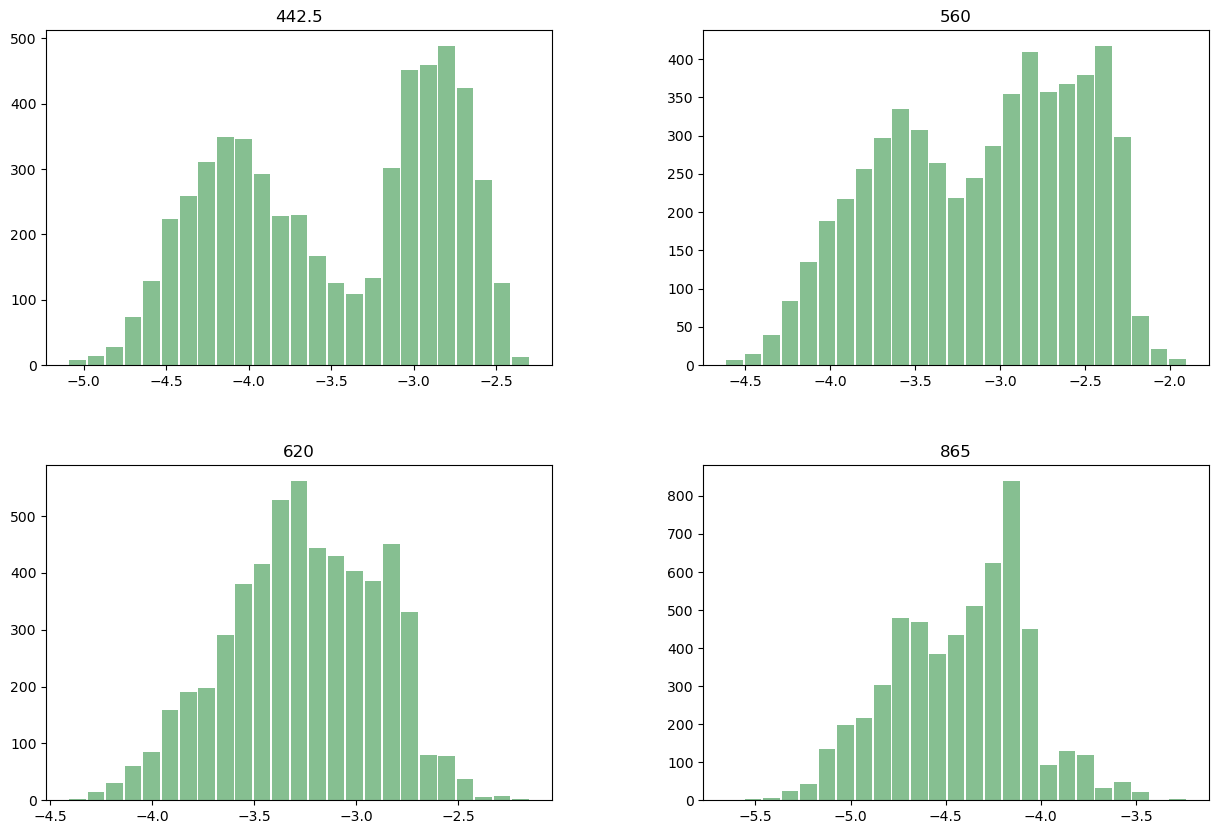

In [7]:
df.hist(column=['442.5','560','620', '865'], bins=25,grid=False, figsize=(15,10), color='#86bf91', 
                    zorder=2, rwidth=0.9)

In [8]:
dy=np.log10(data_y_train)

<Axes: >

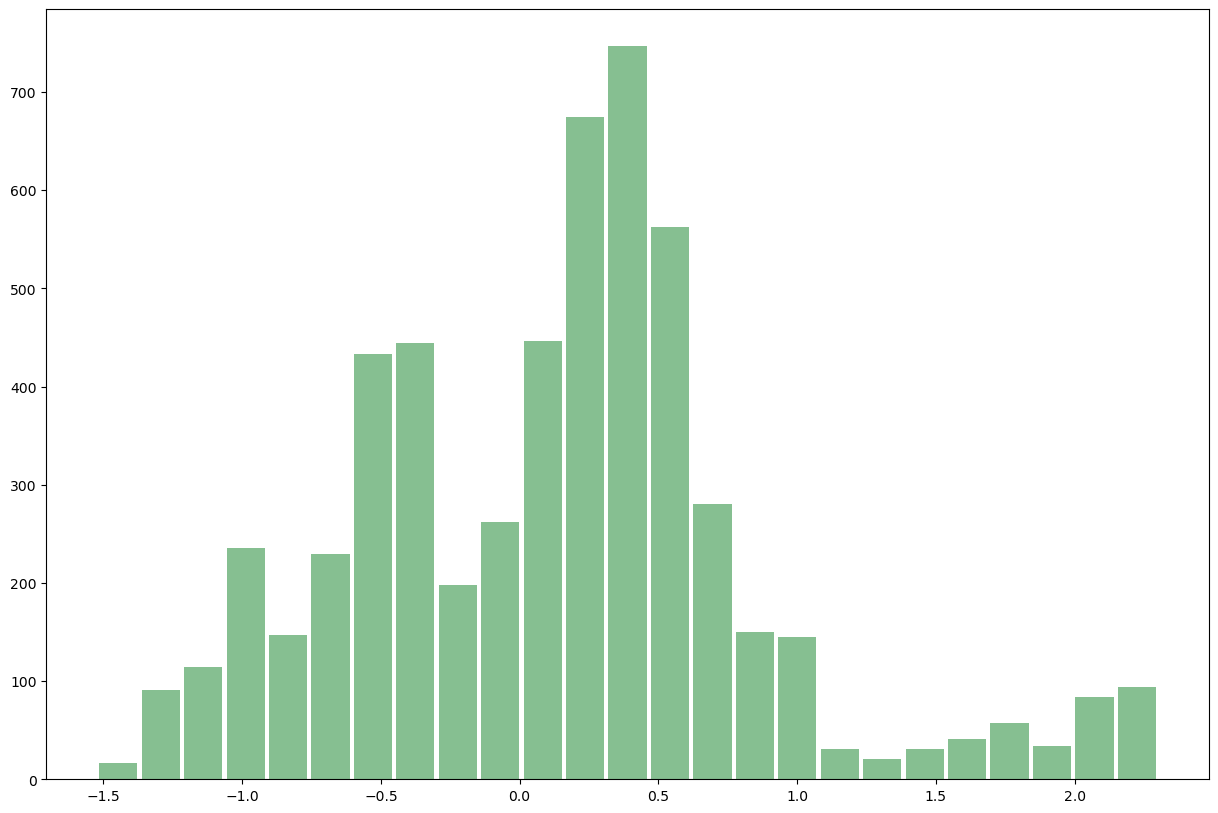

In [9]:
dy.hist(bins=25,grid=False, figsize=(15,10), color='#86bf91', 
                    zorder=2, rwidth=0.9)

## Train the models
[Table of Contents](#Table-of-Contents)

In [10]:
#Import function from ml_regression
from ml.ml_regression import train_models

In [11]:
#Train models specified in 'train_models' (contains different combiantion of data)
train_models()

Trying bands S3bands
Shapes train: (5570, 15) 0         3.30
1         7.20
2         1.20
3         4.00
4         0.15
         ...  
5565      2.70
5566      0.34
5567    200.00
5568      0.08
5569      3.10
Name: Chl, Length: 5570, dtype: float64
-------------------------------------------------
Fitting model: RLR
-------------------------------------------------
Fitting 10 folds for each of 6 candidates, totalling 60 fits
-------------------------------------------------
Fitting model: RFR
-------------------------------------------------
Fitting 10 folds for each of 5 candidates, totalling 50 fits


<hr>
<a href="../../Index.ipynb"><< Index</a>
<br>
<a href="./README.ipynb" target="_blank"><< README</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./Statistics_analysis.ipynb" target="_blank">Statistics and analysis >></a>
<hr>
<a href="https://github.com/wekeo/liege-colloquium-23" target="_blank">View on GitHub</a> | <a href="https://training.eumetsat.int/" target="_blank">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int target="_blank">Contact helpdesk for support </a> | <a href=mailto:Copernicus.training@eumetsat.int target="_blank">Contact our training team to collaborate on and reuse this material</a></span></p>